In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from math import exp

In [2]:
def normalise(array):
    maximum=max(array)
    minimum=min(array)
    for i in range(len(array)):
        array[i]=(array[i]-minimum)/(maximum-minimum)
    return array

In [3]:
def epsilon_greedy(k,eps,iterations,mu='random'):
    
    #k=number of arms
    #eps=exploration fraction-> algorithm will explore with a probability of eps and exploit with a probability of (1-eps)
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if eps==0 and step==0: #eps value indicated exploitation but since the steps are also zero there is no knowledge to exploit-randomly select any arm
            a=np.random.choice(k) #action is chosen
        
        elif p<eps: #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [4]:
def ucb_1(k,iterations,mu='random'):
    
    #k=number of arms
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        
        if step==0: #at first step we have to play each arm atleast once
            for a in range(k):
                reward=reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1
                #updating counts
                pulls+=1
                arm_pull_number[a]+=1
                #updating the rewards
                total_reward+=reward
                avg_reward[step]=total_reward/pulls
                #updating the estimated value of arm a pulled at the current iteration
                q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
        
        else:
            
            upper_bound_arm=q+np.sqrt(np.divide(2*np.log(step),arm_pull_number))
            a=np.argmax(upper_bound_arm) #choosoing the arm with maximum upper bound
        
            reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
            #updating counts
            pulls+=1
            arm_pull_number[a]+=1
        
            #updating the rewards
            total_reward+=reward
            avg_reward[step]=total_reward/pulls
        
            #updating the estimated value of arm a pulled at the current iteration
            q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [5]:
def epsilon_greedy_decay(k,iterations,mu='random'):
    
    #k=number of arms
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    beta=1/k #scaling factor
    
    #decayed epsilon=1/(1+n*beta) ->n=steps taken till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if p<1/(1+step*beta): #case of exploration
            a=np.random.choice(k) #action is chosen randomly from the k arms
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [6]:
def softmax(k,eps,beta,iterations,mu='random'):
    
    #k=number of arms
    #eps=exploration fraction-> algorithm will explore with a probability of eps and exploit with a probability of (1-eps)
    #iterations= number of pulls of the arms
    #mu=an array of length k, which holds the true expected value of each arm
    #mu="random"-> the expected value is sampled from a normal distribution with standard deviation 1 (default)
    #mu=user defined-> the user sends the true expected values of each arm
    #beta=temperature coefficient
    #if beta is very large-shift towards uniform selection during exploration
    #if beta is very small-the prob of arm being during exploration becomes more dependent on the current expected reward
    
    if mu=="random":
        mu=np.random.normal(0,1,k) #now mu is an array containing the true expected values of each arm
    if len(mu)!=k: #case wwhen mu is user defined
        print("The length of the entered array of true expected values does not match with the number of arms entered \n")
        return
    
    q=np.zeros(k) #the array of the estimated expected values of each arm
    pulls=0 #number of pulls at current iteration
    arm_pull_number=np.zeros(k) #stores the number of times each arm has been pulled till the current iteration
    exponential_q=np.zeros(k) #stores the exponential value of the estimated expected rewards
    prob_exploration=np.zeros(k) #stores the probability of each arm being picked during exploration
    reward=0 #the reward earned at the current iteration
    a=0 #the arm pulled at the current iteration
    total_reward=0 #the total rewards won till the current iteration
    avg_reward=np.zeros(iterations) #the average reward per iteration till the current iteration
    
    for step in range(iterations):
        p=np.random.rand() #randomly generates a number between 0 and 1
        
        if eps==0 and step==0: #eps value indicated exploitation but since the steps are also zero there is no knowledge to exploit-randomly select any arm
            a=np.random.choice(k) #action is chosen
        
        elif p<eps: #case of exploration
            
            prob_exploration_sorted=sorted(prob_exploration) #sorted list of prob
            prob_exploration_sorted_cumsum=np.cumsum(prob_exploration_sorted) #cumulative list of sorted prob
            p1=np.random.rand() #generating a random number 
            
            #the arm with the highest probability will have higher chance of getting pulled
            for i in range(len(prob_exploration_sorted_cumsum)): 
                if p1<=prob_exploration_sorted_cumsum[i]:
                    damn=list(prob_exploration)
                    a=damn.index(prob_exploration_sorted[i])
                    #a=prob_exploration.index(prob_exploration_sorted[i])
                    break    
            
        else: #case of exploitation
            a=np.argmax(q) #returns the action with the highest estimated expected value at current iteration
        
        reward=np.random.normal(mu[a],1) #the reward is sampled from the normal distribution with mean equalling the true expected value of arm and a std-dev of 1  
        
        #updating counts
        pulls+=1
        arm_pull_number[a]+=1
        
        #updating the rewards
        total_reward+=reward
        avg_reward[step]=total_reward/pulls
        
        
        #updating the estimated value of arm a pulled at the current iteration
        q[a]=((q[a]*(arm_pull_number[a]-1))+reward)/arm_pull_number[a]
        
        #updating the exponential estimated expected rewards
        exponential_q[a]=exp(q[a]/beta)
        
        #updating the probability of the arm being picked during exploration based on the new estimated reward
        prob_exploration[a]=exp(q[a])/np.sum(exp(q[a]))
        
    avg_reward=normalise(avg_reward) #fits the average rewards between a scale of 0 and 1
    
    #returns the estimated expected values of the arms after all the iterations and
    #the average normalised reward per iteration at each iteration
    #the number of arm pulls of each arm
    
    return q,avg_reward,arm_pull_number 

In [10]:
k=10 #number of arms
episodes=1000 #no of times the total experiments are conducted
iterations=1000 #no of pulls in 1 episode
mu=np.random.normal(0,1,k) #true expected rewards of all the 10 arms-all rewards are sampled from normal distributions with sttd-dev 1 
#long term rewards- avg rewards over all the episodes
reward_1_long=np.zeros(iterations)
reward_softmax_long=np.zeros(iterations)


#long term arm pulls- avg number of pulls of each arm over all the episodes
arm_pulls1_long=np.zeros(k)
arm_pulls_softmax_long=np.zeros(k)


for i in tqdm(range(episodes)):
    q_1,avg_reward_1,arm_pull_number1=epsilon_greedy(k,0.1,iterations,mu)
    q_softmax,avg_reward_softmax,arm_pull_number_softmax=softmax(k,0.1,1,iterations,mu)
    
    #updating the long term rewards
    reward_1_long=reward_1_long+(avg_reward_1-reward_1_long)/(i+1)
    reward_softmax_long=reward_softmax_long+(avg_reward_softmax-reward_softmax_long)/(i+1)
    
    #updating the long term arm pulls
    arm_pulls1_long=arm_pulls1_long+(arm_pull_number1-arm_pulls1_long)/(i+1)
    arm_pulls_softmax_long=arm_pulls_softmax_long+(arm_pull_number_softmax-arm_pulls_softmax_long)/(i+1)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:29<00:00, 33.81it/s]


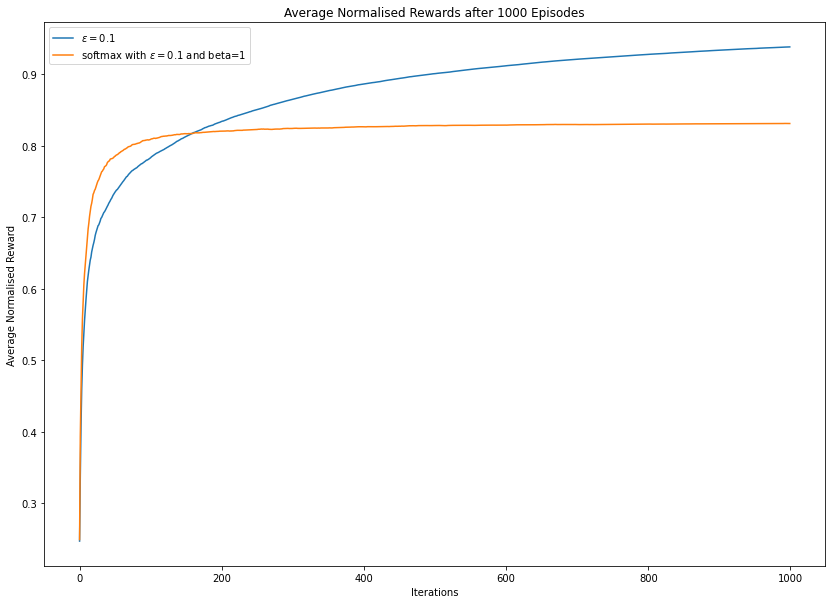

In [11]:
plt.figure(figsize=(14,10))
plt.plot(reward_1_long, label="$\epsilon=0.1$")
plt.plot(reward_softmax_long, label="softmax with $\epsilon=0.1$ and beta=1")
plt.xlabel("Iterations")
plt.ylabel("Average Normalised Reward")
plt.title("Average Normalised Rewards after " + str(episodes) + " Episodes")
plt.legend()
plt.show()

In [10]:
k=10 #number of arms
episodes=1000 #no of times the total experiments are conducted
iterations=1000 #no of pulls in 1 episode
#mu=np.random.normal(0,1,k) #true expected rewards of all the 10 arms-all rewards are sampled from normal distributions with sttd-dev 1 
mu=[i for i in range(10)]
#long term rewards- avg rewards over all the episodes
reward_1_long=np.zeros(iterations)
reward_10_long=np.zeros(iterations)
reward_01_long=np.zeros(iterations)

#long term arm pulls- avg number of pulls of each arm over all the episodes
arm_pulls1_long=np.zeros(k)
arm_pulls10_long=np.zeros(k)
arm_pulls01_long=np.zeros(k)



for i in tqdm(range(episodes)):
    q_1,avg_reward_1,arm_pull_number1=softmax(k,0.1,0.1,iterations,mu)
    q_10,avg_reward_10,arm_pull_number10=softmax(k,0.1,1,iterations,mu)
    q_01,avg_reward_01,arm_pull_number01= softmax(k,0.1,10,iterations,mu)

    #updating the long term rewards
    reward_1_long=reward_1_long+(avg_reward_1-reward_1_long)/(i+1)
    reward_10_long=reward_10_long+(avg_reward_10-reward_10_long)/(i+1)
    reward_01_long=reward_01_long+(avg_reward_01-reward_01_long)/(i+1)
    
    #updating the long term arm pulls
    arm_pulls1_long=arm_pulls1_long+(arm_pull_number1-arm_pulls1_long)/(i+1)
    arm_pulls10_long=arm_pulls10_long+(arm_pull_number10-arm_pulls10_long)/(i+1)
    arm_pulls01_long=arm_pulls01_long+(arm_pull_number01-arm_pulls01_long)/(i+1)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.55it/s]


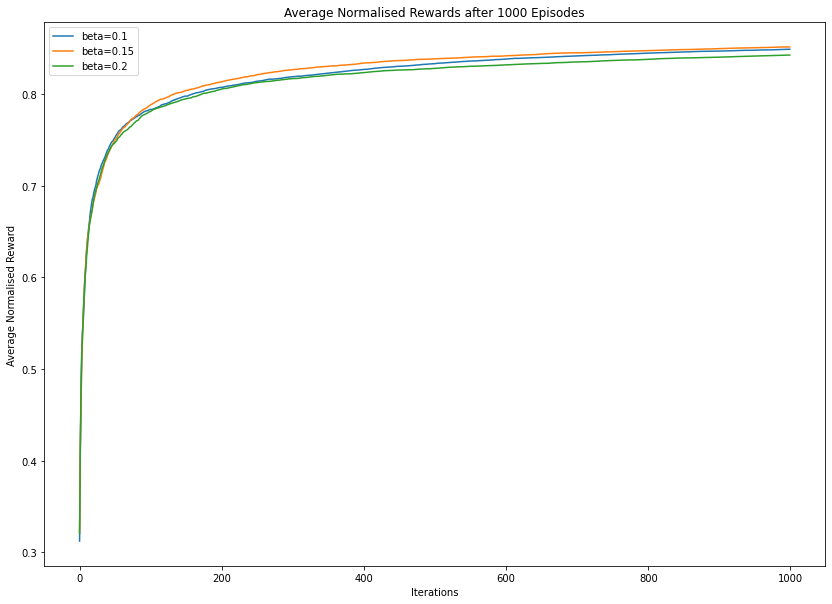

In [11]:
plt.figure(figsize=(14,10))
plt.plot(reward_1_long, label="beta=0.1")
plt.plot(reward_10_long, label="beta=0.15")
plt.plot(reward_01_long, label="beta=0.2")
plt.xlabel("Iterations")
plt.ylabel("Average Normalised Reward")
plt.title("Average Normalised Rewards after " + str(episodes) + " Episodes")
plt.legend()
plt.show()

In [108]:
prob=[12,9,1] 

In [109]:
sort_prob = sorted(prob)

In [103]:
sort_prob

[1, 9, 12]

In [104]:
sort_prob_cumsum=np.cumsum(sort_prob)
sort_prob_cumsum

array([ 1, 10, 22], dtype=int32)

In [105]:
#p=np.random.rand()
p=8
for i in range(len(sort_prob_cumsum)):
    if p<=sort_prob_cumsum[i]:
        arm=prob.index(sort_prob[i])
        break

In [106]:
p


8

In [107]:
arm

1